In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("D:\data-analytics\Housing.csv")
data.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


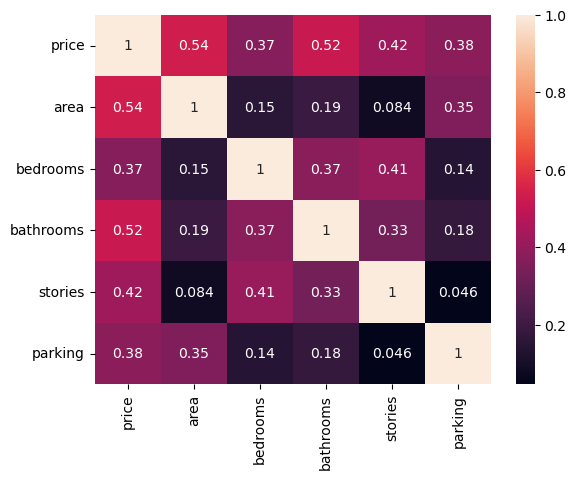

In [2]:
# print(data.head(5))
sns.heatmap(data=data.corr(), annot=True)
plt.show()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
en_data = data[["mainroad", "guestroom","basement","hotwaterheating","airconditioning","prefarea"]]

from sklearn.preprocessing import OneHotEncoder
ohe2 = OneHotEncoder(drop="first")  
ar2 = ohe2.fit_transform(en_data).toarray()
ar2

array([[1., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [18]:
reduced_df = pd.DataFrame(ar2, columns=["mainroad", "guestroom","basement","hotwaterheating","airconditioning","prefarea"])
reduced_df

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0
541,0.0,0.0,0.0,0.0,0.0,0.0
542,1.0,0.0,0.0,0.0,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data = data.drop(columns=en_data.columns)

KeyError: "['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] not found in axis"

In [22]:
data = pd.concat([data, reduced_df], axis=1)


In [23]:
data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,furnished,1.0,0.0,0.0,0.0,1.0,1.0
1,12250000,8960,4,4,4,3,furnished,1.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,2,semi-furnished,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,furnished,1.0,0.0,1.0,0.0,1.0,1.0
4,11410000,7420,4,1,2,2,furnished,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished,1.0,0.0,1.0,0.0,0.0,0.0
541,1767150,2400,3,1,1,0,semi-furnished,0.0,0.0,0.0,0.0,0.0,0.0
542,1750000,3620,2,1,1,0,unfurnished,1.0,0.0,0.0,0.0,0.0,0.0
543,1750000,2910,3,1,1,0,furnished,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["furnishingstatus"] = le.fit_transform(data["furnishingstatus"])
data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,en_code
0,13300000,7420,4,2,3,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0
1,12250000,8960,4,4,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,12250000,9960,3,2,2,2,1,1.0,0.0,1.0,0.0,0.0,1.0,1
3,12215000,7500,4,2,2,3,0,1.0,0.0,1.0,0.0,1.0,1.0,0
4,11410000,7420,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0,2
541,1767150,2400,3,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1
542,1750000,3620,2,1,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,2
543,1750000,2910,3,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:
x = data.iloc[:, 1:]
y = data["price"]
x

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,en_code
0,7420,4,2,3,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0
1,8960,4,4,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,9960,3,2,2,2,1,1.0,0.0,1.0,0.0,0.0,1.0,1
3,7500,4,2,2,3,0,1.0,0.0,1.0,0.0,1.0,1.0,0
4,7420,4,1,2,2,0,1.0,1.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0,2
541,2400,3,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1
542,3620,2,1,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,2
543,2910,3,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
sc = StandardScaler()
sc.fit(x)
# sc.transform(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,en_code
0,1.046726,1.403419,1.421812,1.378217,1.517692,-1.406286,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,2.679409,-1.406286,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,1.517692,-0.091662,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,-0.091662
3,1.083624,1.403419,1.421812,0.224410,2.679409,-1.406286,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-1.406286
4,1.046726,1.403419,-0.570187,0.224410,1.517692,-1.406286,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,1.222962,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035,1.222962
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,-0.091662,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.091662
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,1.222962,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,1.222962
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,-1.406286,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-1.406286


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [38]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100 #to check the accuracy = 64%

64.94754192267797

# LinearRegression

Text(0, 0.5, 'coeff')

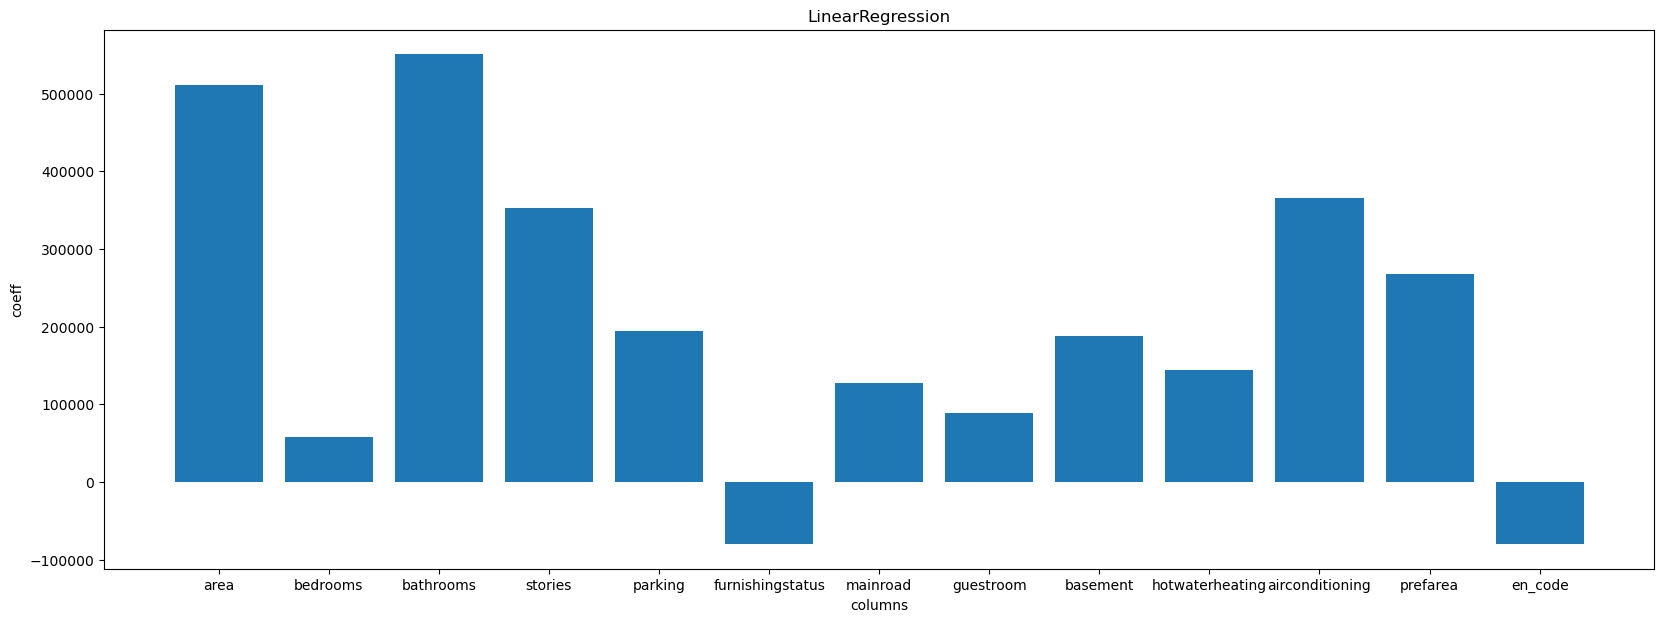

In [53]:
plt.figure(figsize=(20,7))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coeff")

# Lasso

In [49]:
#feature selectionn
la = Lasso(alpha=0.05)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100 #to check the accuracy in the lasso technique = 64%


64.9475404538615

Text(0, 0.5, 'coeff')

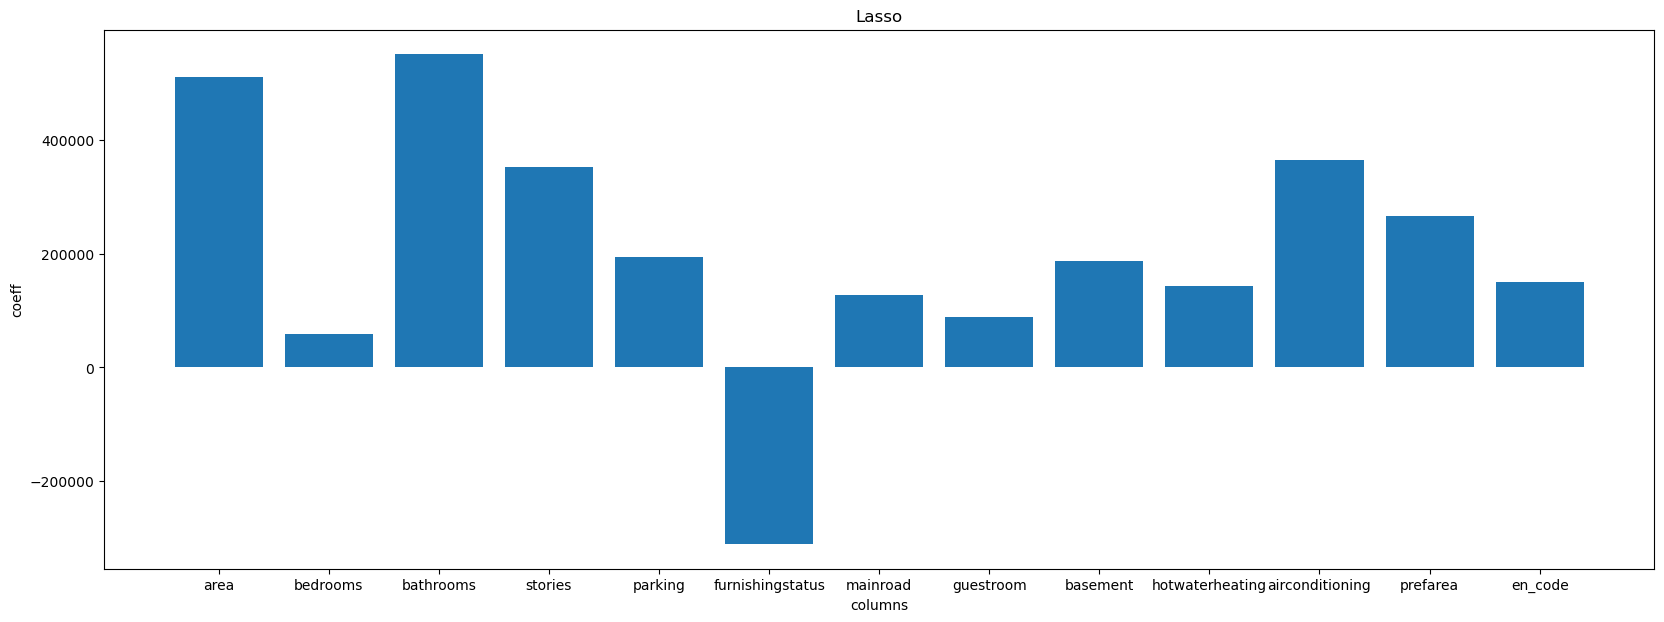

In [54]:
plt.figure(figsize=(20,7))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coeff")

# Ridge

In [55]:
ri = Ridge(alpha = 10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

64.83522083233282

Text(0, 0.5, 'coeff')

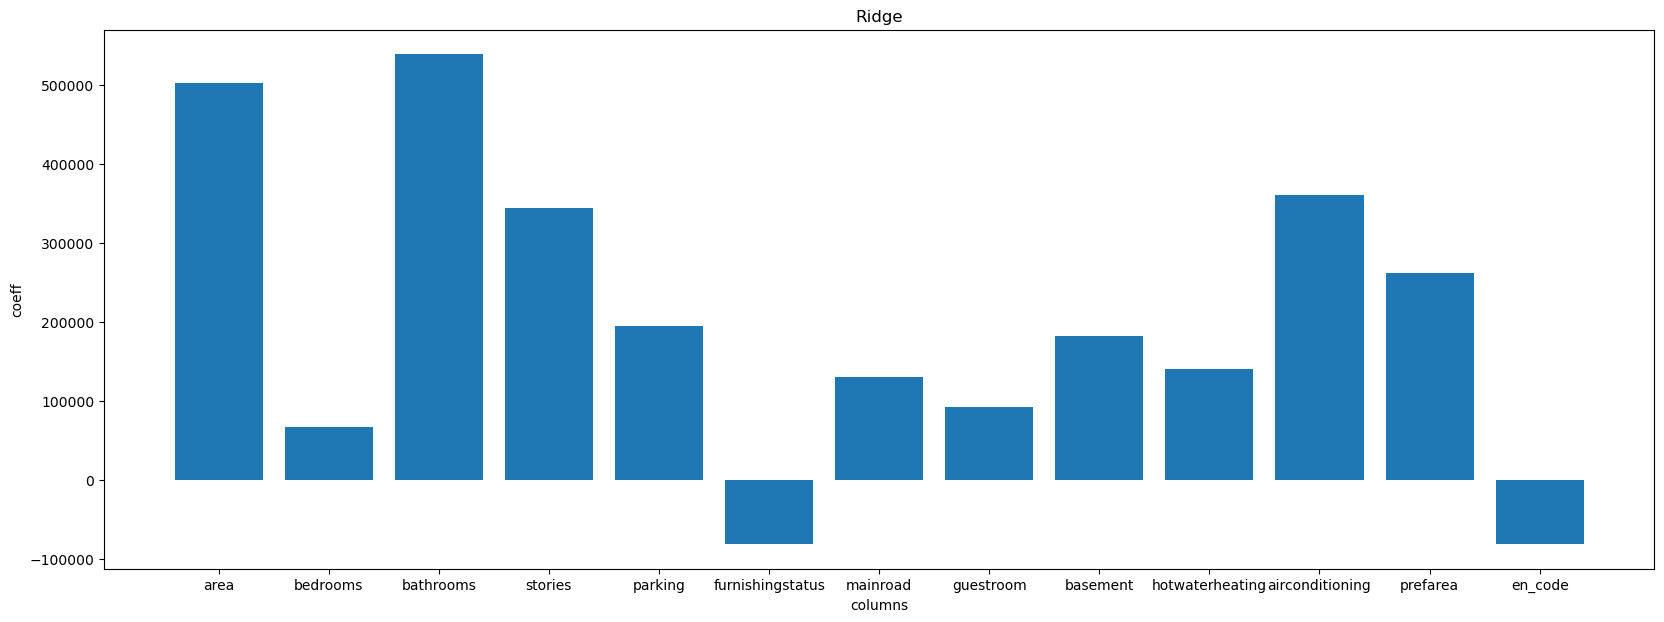

In [56]:
plt.figure(figsize=(20,7))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coeff")

In [60]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np
mean_absolute_error(y_test, lr.predict(x_test)) , mean_squared_error(y_test, lr.predict(x_test)), np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))

(979679.6912959905, 1771751116594.0388, 1331071.416789512)

In [61]:
mean_absolute_error(y_test, la.predict(x_test)) , mean_squared_error(y_test, la.predict(x_test)), np.sqrt(mean_squared_error(y_test, la.predict(x_test)))

(979679.709403757, 1771751190836.3982, 1331071.444677707)

In [62]:
mean_absolute_error(y_test, ri.predict(x_test)) , mean_squared_error(y_test, ri.predict(x_test)), np.sqrt(mean_squared_error(y_test, ri.predict(x_test)))

(978357.2241328118, 1777428465007.0112, 1333202.334609046)

In [64]:
df = pd.DataFrame({ "col_name": x.columns, "LinearRegression": lr.coef_, "Lasso": la.coef_, "Ridge": ri.coef_ })
df

,col_name,LinearRegression,Lasso,Ridge
0,area,511355.314864,511355.295781,501863.604483
1,bedrooms,57939.764185,57939.751516,66469.456615
2,bathrooms,550762.108735,550762.081786,538742.251504
3,stories,352072.086344,352072.042647,344358.781546
4,parking,194330.065331,194330.028348,195181.445749
5,furnishingstatus,-80021.792219,-310441.730429,-81124.147778
6,mainroad,127770.253636,127770.236597,129904.418727
7,guestroom,89178.007942,89177.989243,92468.544682
8,basement,187581.884388,187581.850953,182207.392642
9,hotwaterheating,143909.241493,143909.196731,140680.452353
